# Principal Component Analysis (PCA)

**dataset: sklearn's built-in breast cancer dataset**

PCA isn't exactly a full machine learning algorithm, but instead an unsupervised learning algorithm. PCA is just a transformation of the data and attempts to find out what features explain the most variance in the data. For example:

<img src='PCA.png' />

### Importing libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Getting the data

In [2]:
# loading dataset from sklearn
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [10]:
# checking the type of the cancer variable
type(cancer)

sklearn.utils.Bunch

In [5]:
# describing the dataset
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [6]:
# printing the keys (features names) of the dataset
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

## Loading the data to a dataframe

In [9]:
df = pd.DataFrame(data=cancer['data'], columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Getting the info() of the dataframe:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

#### Checking the 'target' column of the dataset:

In [12]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0,

#### Checking the 'target_names' of the dataset, i.e. what actually means the 0 and 1 in the 'target' column:

In [13]:
cancer['target_names']

array(['malignant', 'benign'],
      dtype='<U9')

### Principal Component Analysis is used to finding out what components are the most important ones that explain the most variance of this data set.

**Note: When using a supervised classification algorithm, doing PCA first helps to actually getting an idea of what's important between the features (e.g. here, if a tumor is malignant or benign).**

## PCA Visualization

In that dataset, it is difficult to visualize high dimensional data. Thus, PCA can be used to finding the first two principal components, and visualizing the data in this new, two-dimensional space, with a single scatter-plot.

Before this, it is needed to scaling the data (of the dataframe) so that each feature has a single unit variance.

#### 1) Scaling the data:

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
# instantiating the scaler object
scaler = StandardScaler()

In [16]:
# fitting the data of the dataframe for scaling
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
# tranforming the data to the new scale
scaled_data = scaler.transform(df)

#### 2) Using PCA
PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. A PCA object is instantiated, the principal components using the fit method are afound, then the rotation and dimensionality reduction by calling transform() is applied.

There is also specified how many components is wanted to be kept when creating the PCA object.

In [18]:
from sklearn.decomposition import PCA

In [19]:
# instantiating the PCA object and specifying the number of component I want to be kept
pca = PCA(n_components=2)

here, n_components --> 2: Visualizing the entire 30-dimensional dataset just by the two principal components.

In [20]:
# fitting the data
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

**Transforming this data to its first 2 principal components:**

In [21]:
x_pca = pca.transform(scaled_data)

**checking the shape of the scaled dataset:**

In [23]:
scaled_data.shape

(569, 30)

**checking the shape of the x_pca dataset after the transformation of the applied PCA:**

In [24]:
x_pca.shape

(569, 2)

In [25]:
# type of x_pca
type(x_pca)

numpy.ndarray

30 dimensions are reduced to just 2!

#### 3) Visualizing the data of the transformed dataset after PCA

Text(0,0.5,'Second Principal Component')

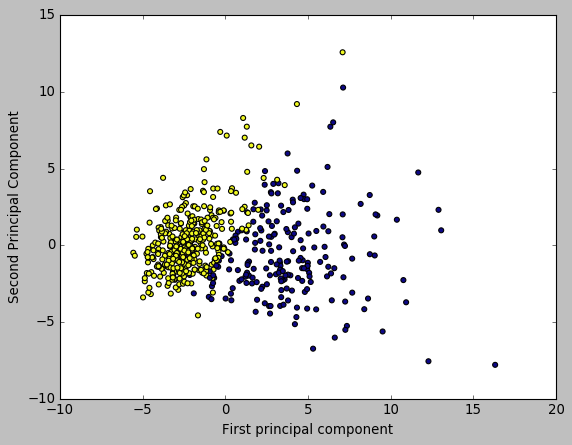

In [35]:
plt.style.use('classic')
plt.figure(figsize=(8,6))
# x_pca[:,0] --> grabbing all rows from column 0, x_pca[:,1] --> grabbing all rows from column 1
# c = color --> passing the 'target' column for coloring based on 0 or 1. ('malignant', 'benign' tumors)
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components, as resulted by the the exploitation of PCA, these two classes can be easily separated.

PCA works as a compresion algorithm.

## Interpreting the components

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [36]:
# checking the final array of the transformed data of the applied PCA
x_pca

array([[  9.19283683,   1.94858307],
       [  2.3878018 ,  -3.76817174],
       [  5.73389628,  -1.0751738 ],
       ..., 
       [  1.25617928,  -1.90229671],
       [ 10.37479406,   1.67201011],
       [ -5.4752433 ,  -0.67063679]])

In [37]:
# checking the array of the actual components
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

**In this numpy matrix array, each row represents a principal component, and each column relates back to the original features.**

This relationship can be visualized with a heatmap:

In [38]:
df_components = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [39]:
df_components

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


There are 2 rows, as the PCA object was set up earlier.

#### Making the heatmap that shows the relationship between the correlation of the various features and the principal component themselves:

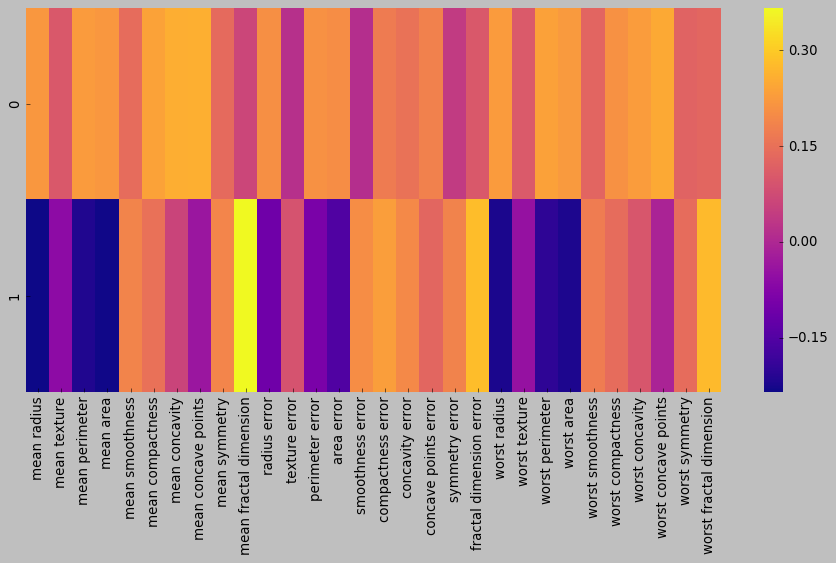

In [41]:
plt.figure(figsize=(14,6))
sns.heatmap(df_components, cmap='plasma')

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

Basically each principal component is shown here as a row. The higher the number or the hotter looking the colors (here it's the yellow) this means it's more correlated to a specific feature in the columns.

That's really the best explanation for what principal components represent: Their combinations of all these features. Thus, someone can see what features were specifically important to one of the principal components versus the other.

This is one of the best ways when dealing with high dimensional data.

Now, the reduced version of these principal components (i.e. the **x_pca** numpy matrix array) can be fit in into a classification algorithm. A logistic regression on **x_pca** instead of doing a logistic regression on the entire dataframe of features can be applied.

As seen from the scatter plot above, the points are easily separable by just almost a straight line, and support vector machines may actually be a good choice for this to make accurate predictions.

A heatmap is always a good idea for understanding the features and what's behind the scenes.

*Note: A 3D analysis of the PCA will be implemented and uploaded on Github soon..*